In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import preprocessing
import seaborn as sns
import pathlib

C:\Users\nishina\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns', 100)
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

In [ ]:
data_path = pathlib.Path('../../data')
file_input = data_path/'input/course_data.csv'
file_output = data_path/'inter/course_data_cluster.csv'

In [124]:
df_course = pd.read_csv(file_input)
df_course.index = df_course['競馬場']
df_course = df_course = df_course.drop('競馬場', axis=1)
df_course = pd.get_dummies(df_course, columns=['周り'])
df_course['一周距離_芝'] = df_course['一周距離_芝'].map(lambda x: x.replace(',', ''))

In [125]:
mm = preprocessing.MinMaxScaler()
df_course_min_max = mm.fit_transform(df_course)
df_course_min_max

array([[0.        , 0.88560916, 1.        , 1.        , 0.35750102,
        0.43478261, 0.96296296, 0.75      , 0.60526316, 0.75757576,
        1.        , 0.83333333, 0.6969697 , 0.25806452, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.28205128, 0.40909091, 0.0212766 , 0.11627907, 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.54546198, 0.        , 0.4375    , 0.06491394,
        1.        , 1.        , 0.5       , 0.68421053, 0.66666667,
        0.6       , 0.        , 0.        , 0.        , 0.        ,
        0.03225806, 0.05263158, 0.07017544, 0.11666667, 0.15555556,
        0.61538462, 0.81818182, 0.91489362, 1.        , 0.82857143,
        0.48484848, 1.        , 0.        , 0.        ],
       [0.        , 0.68659035, 0.36363636, 0.4375    , 0.06491394,
        1.        , 0.92592593, 1.        , 1.        , 0.66666667,
        0.6       , 0.        , 0.        , 0.        , 0.        ,
  

In [147]:
model = KMeans(n_clusters=6, random_state=10).fit(df_course_min_max)
df_course['cluster'] = model.labels_
df_course.to_csv(file_output)

In [134]:
#df_course_height = df_course.filter(like='勾配', axis=1)
#model = KMeans(n_clusters=4, random_state=10).fit(df_course_height)
#df_course_height['cluster'] = model.labels_
#df_course_height

In [143]:
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

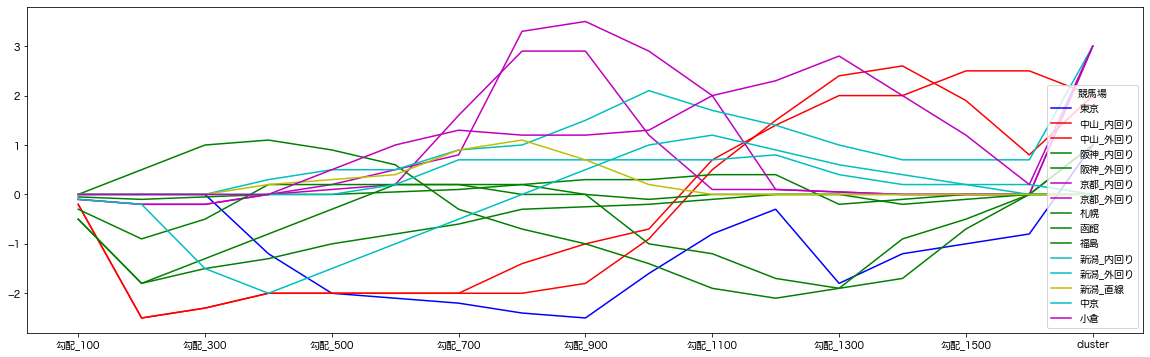

In [144]:
label_color_list = [ color_list[c] for c in df_course['cluster'] ]
df_course_height.T.plot.line(figsize=(20, 6), style=label_color_list)

In [137]:
#label_color_list = [ color_list[c] for c in df_course_height['cluster'] ]
#df_course_height.T.plot.line(figsize=(20, 6), style=label_color_list)

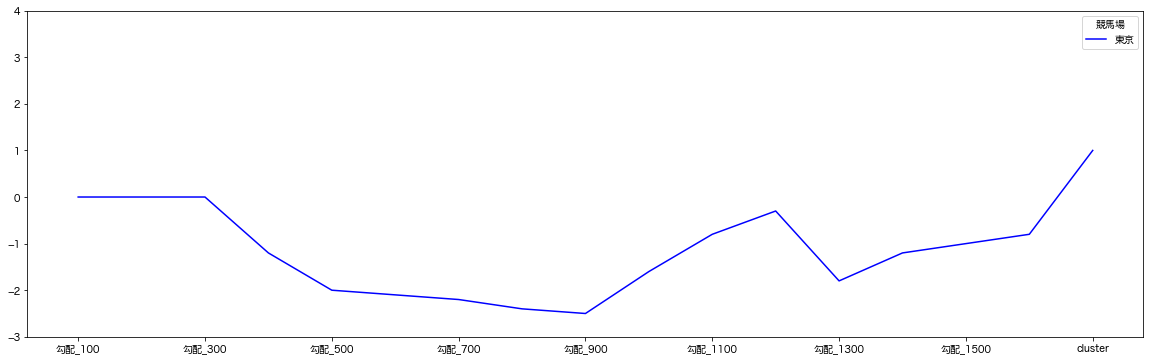

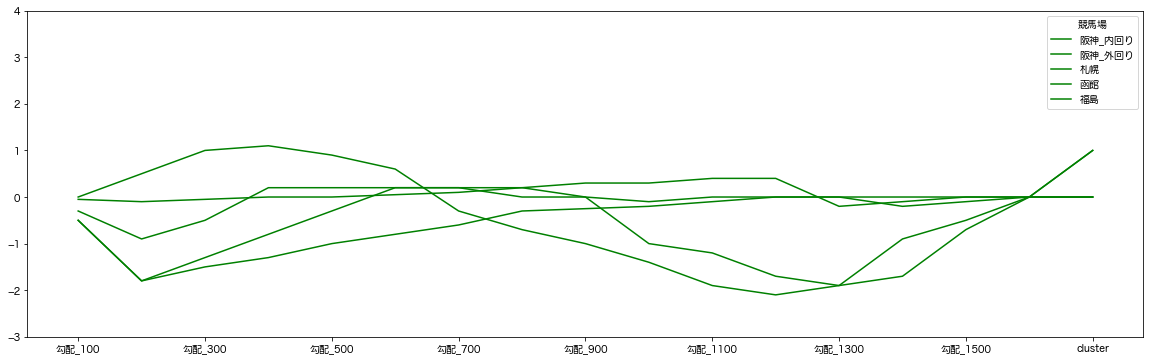

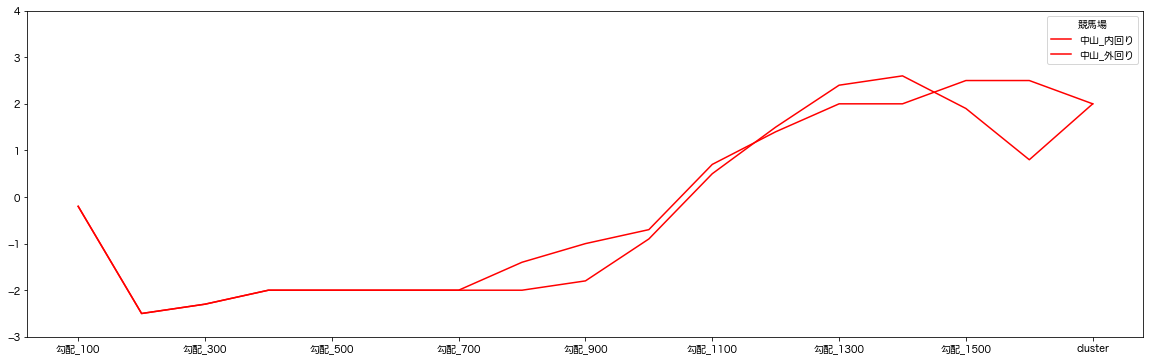

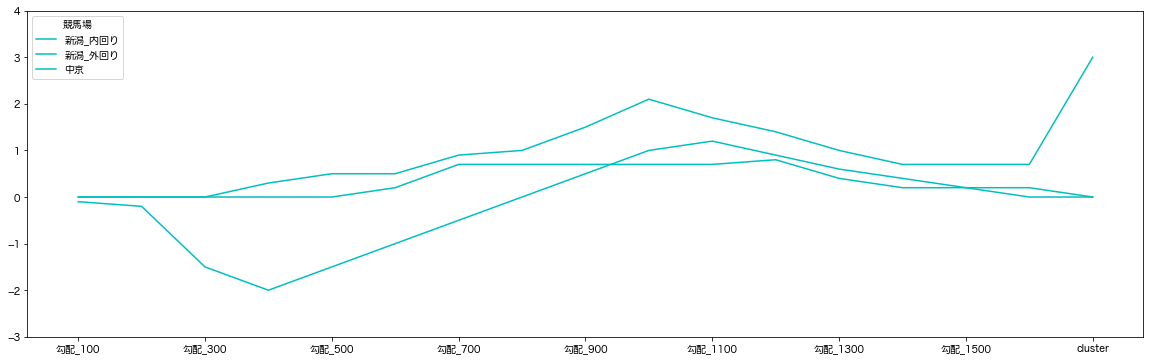

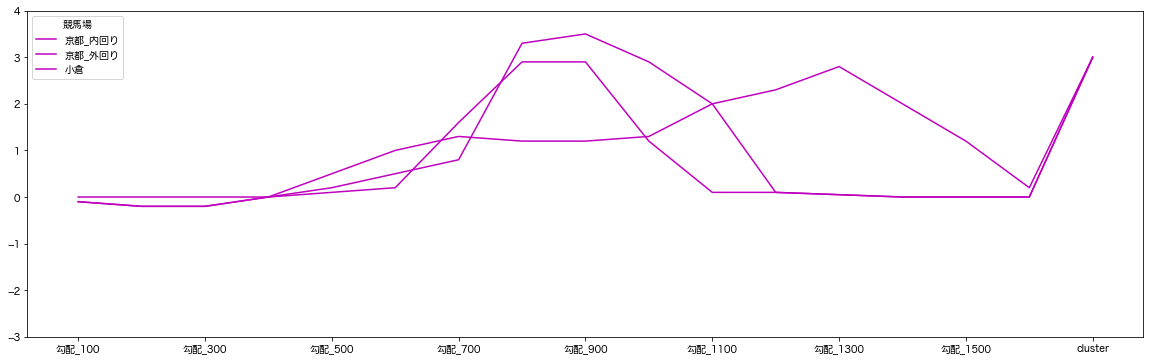

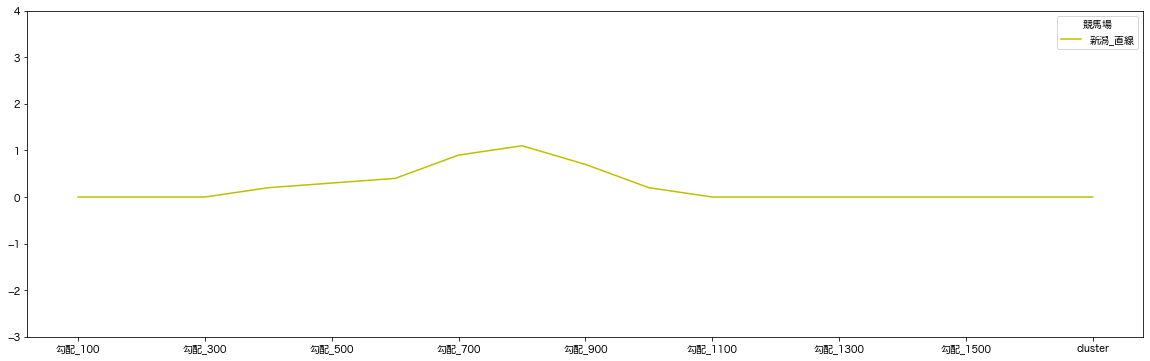

In [145]:
for i in range(6):
    df_course_height[df_course['cluster'] == i].T.plot.line(figsize=(20, 6), style=color_list[i], ylim=[-3,4])
    # df_course_height[df_course_height['cluster'] == i].T.plot.line(figsize=(20, 6), style=color_list[i])

In [ ]:
df_course_corner = df_course.filter(like='コーナー', axis=1)
sum = []
for index in df_course_corner.index:
    sum.append(df_course_corner.loc[index].values.sum())
df_course['コーナー距離合計'] = sum
df_course

In [ ]:
df_course_pairplot = df_course[['一周距離_芝', '直線距離_芝', 'コーナー距離合計', '周り_右', '周り_左', '周り_直線', '高低差_芝', '洋芝', 'cluster']]

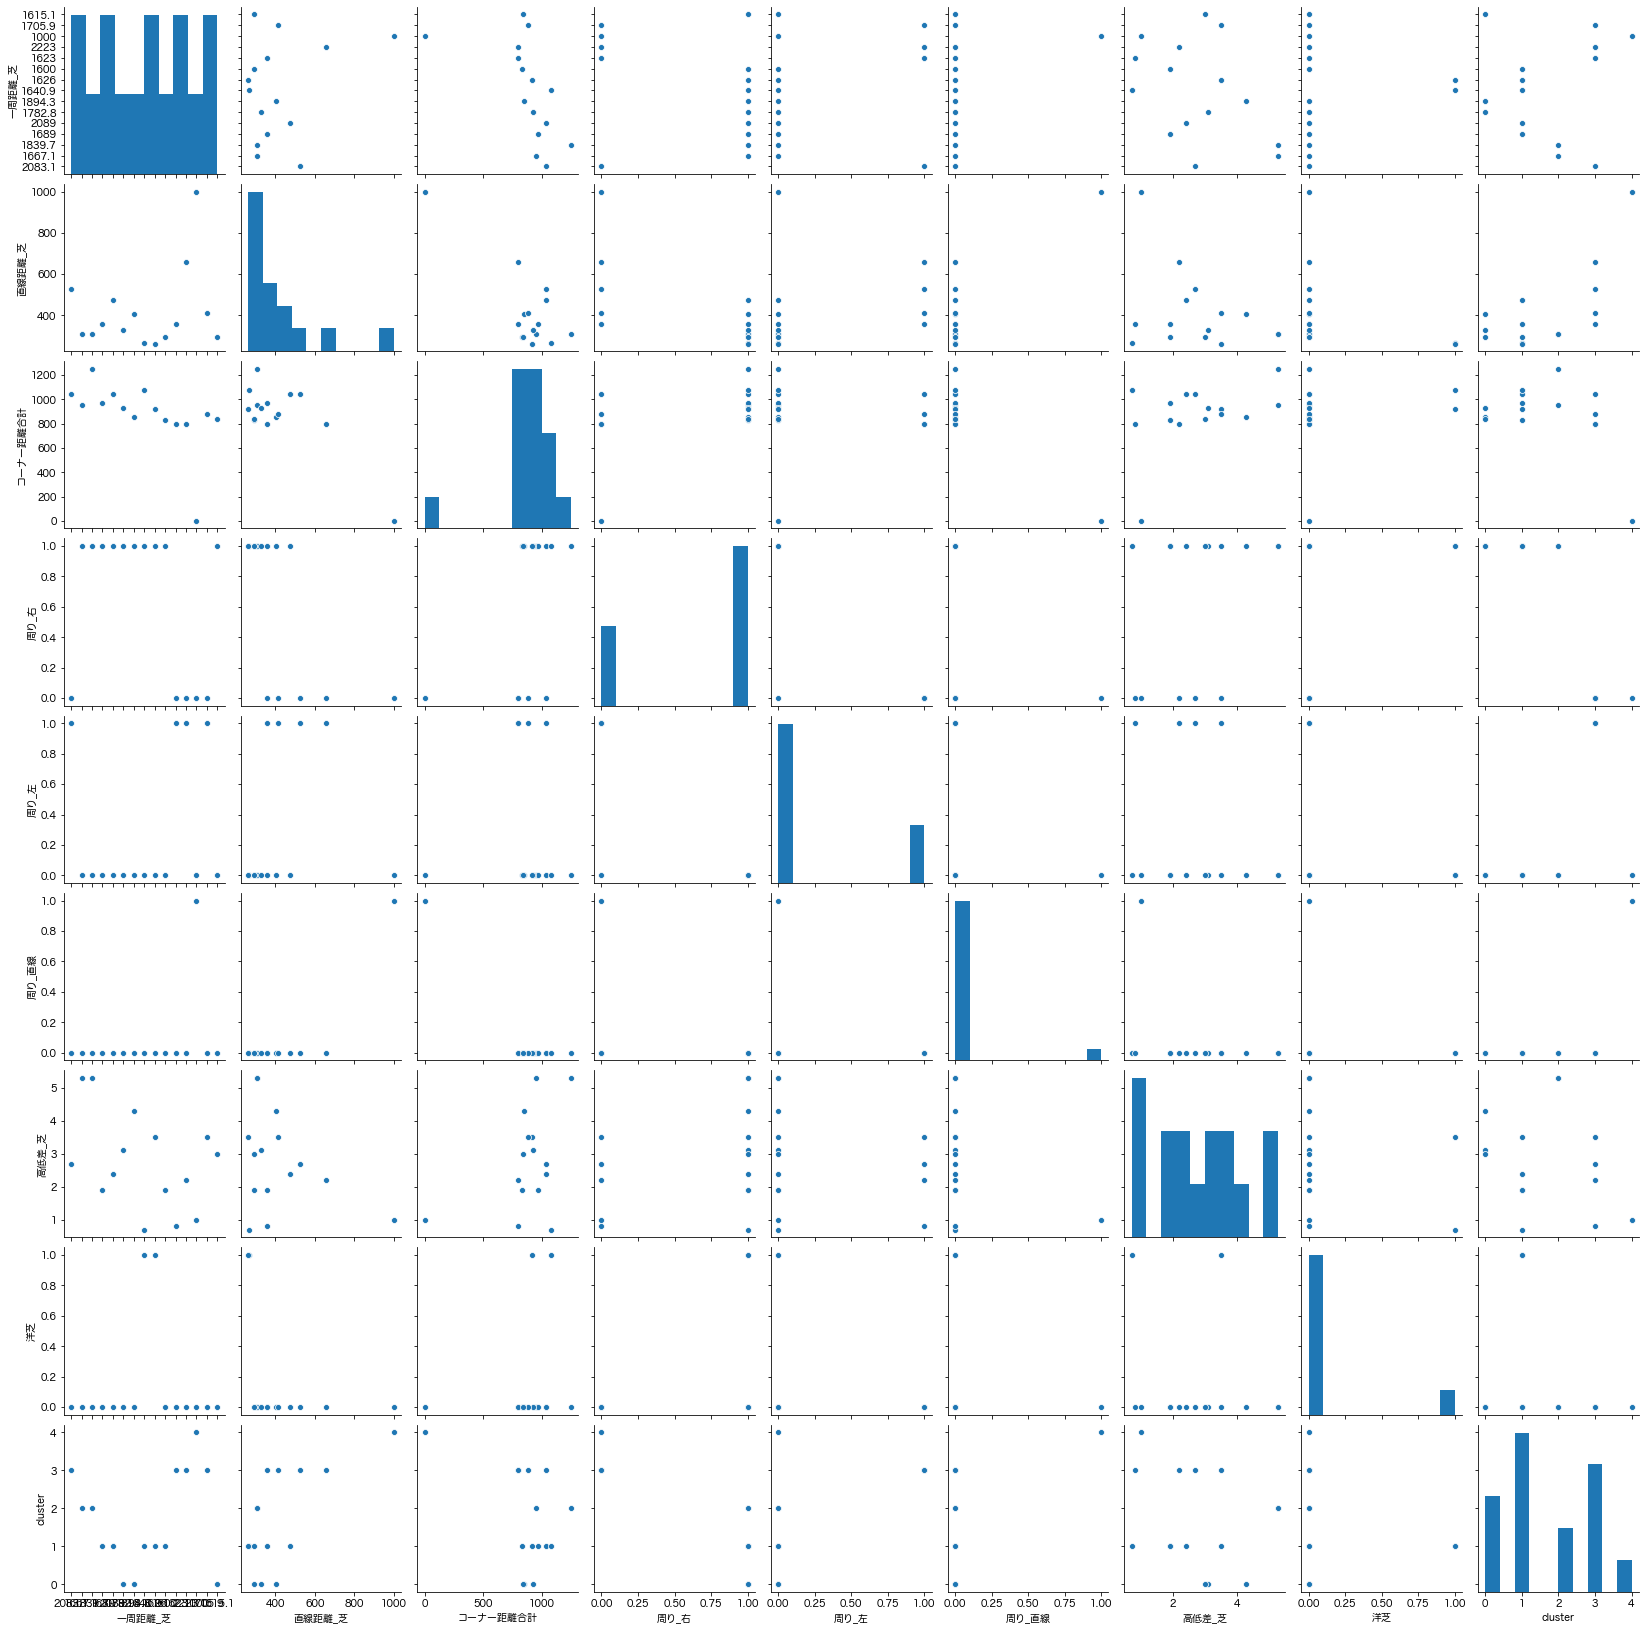

In [95]:
sns.pairplot(df_course_pairplot)